In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold,train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,mean_absolute_error,r2_score
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,StandardScaler
from drawdata import draw_scatter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('4class_hard_path.csv')
x=df.iloc[:,1:]
y=x.pop('z')
y=LabelEncoder().fit_transform(y)
for i in range(x.shape[1]):
    x.iloc[np.random.choice(a=[False, True], size=x.shape[0],p=[0.8,0.2]),i]=np.nan 
x=x.values
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

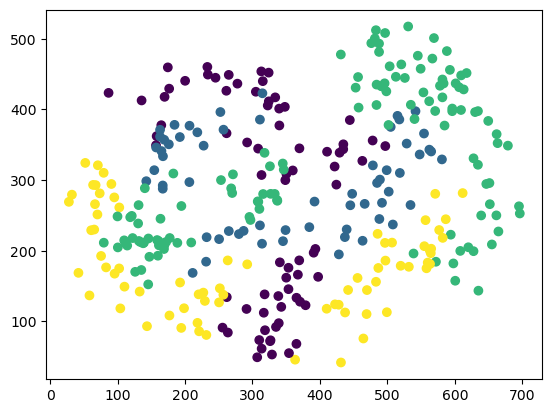

In [67]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer,SimpleImputer
pipe=Pipeline([('scaling',StandardScaler()),
              ('imputer',KNNImputer()),
              ('estimator',RidgeClassifier()),])
params={
    'estimator': [RandomForestClassifier(),KNeighborsClassifier(n_neighbors=4),SVC(kernel='rbf')],
    'imputer': [KNNImputer(),IterativeImputer(max_iter=3),SimpleImputer(strategy='median')] 
}
cls=GridSearchCV(pipe,params,scoring=['f1_macro','roc_auc_ovr_weighted'],refit='f1_macro',verbose=10,cv=5)
cls.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START estimator=RandomForestClassifier(), imputer=KNNImputer()....
[CV 1/5; 1/9] END estimator=RandomForestClassifier(), imputer=KNNImputer(); f1_macro: (test=0.567) roc_auc_ovr_weighted: (test=0.801) total time=   0.2s
[CV 2/5; 1/9] START estimator=RandomForestClassifier(), imputer=KNNImputer()....
[CV 2/5; 1/9] END estimator=RandomForestClassifier(), imputer=KNNImputer(); f1_macro: (test=0.690) roc_auc_ovr_weighted: (test=0.879) total time=   0.2s
[CV 3/5; 1/9] START estimator=RandomForestClassifier(), imputer=KNNImputer()....
[CV 3/5; 1/9] END estimator=RandomForestClassifier(), imputer=KNNImputer(); f1_macro: (test=0.632) roc_auc_ovr_weighted: (test=0.846) total time=   0.2s
[CV 4/5; 1/9] START estimator=RandomForestClassifier(), imputer=KNNImputer()....
[CV 4/5; 1/9] END estimator=RandomForestClassifier(), imputer=KNNImputer(); f1_macro: (test=0.610) roc_auc_ovr_weighted: (test=0.886) total time=   0.2s
[CV 

[CV 3/5; 8/9] END estimator=SVC(), imputer=IterativeImputer(max_iter=3); f1_macro: (test=0.522) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 4/5; 8/9] START estimator=SVC(), imputer=IterativeImputer(max_iter=3).......
[CV 4/5; 8/9] END estimator=SVC(), imputer=IterativeImputer(max_iter=3); f1_macro: (test=0.661) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 5/5; 8/9] START estimator=SVC(), imputer=IterativeImputer(max_iter=3).......
[CV 5/5; 8/9] END estimator=SVC(), imputer=IterativeImputer(max_iter=3); f1_macro: (test=0.586) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 1/5; 9/9] START estimator=SVC(), imputer=SimpleImputer(strategy='median')...
[CV 1/5; 9/9] END estimator=SVC(), imputer=SimpleImputer(strategy='median'); f1_macro: (test=0.540) roc_auc_ovr_weighted: (test=nan) total time=   0.0s
[CV 2/5; 9/9] START estimator=SVC(), imputer=SimpleImputer(strategy='median')...
[CV 2/5; 9/9] END estimator=SVC(), imputer=SimpleImputer(strategy='median'); f1_

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('imputer',
                                        <class 'sklearn.impute._knn.KNNImputer'>),
                                       ('estimator', RidgeClassifier())]),
             param_grid={'estimator': [RandomForestClassifier(),
                                       KNeighborsClassifier(n_neighbors=4),
                                       SVC()],
                         'imputer': [KNNImputer(), IterativeImputer(max_iter=3),
                                     SimpleImputer(strategy='median')]},
             refit='f1_macro', scoring=['f1_macro', 'roc_auc_ovr_weighted'],
             verbose=10)

In [70]:
print(cls.best_estimator_)
print(cls.score(x_test,y_test))
print(confusion_matrix(y_test,cls.predict(x_test)))

Pipeline(steps=[('scaling', StandardScaler()),
                ('imputer', IterativeImputer(max_iter=3)),
                ('estimator', KNeighborsClassifier(n_neighbors=4))])
0.631547619047619
[[17  1  4  1]
 [ 4 11  5  1]
 [ 5  8 26  3]
 [ 2  1  3 12]]
